In [1]:

from Bio import Entrez, SeqIO

Entrez.email = "your_email@example.com"  # Replace with your email

# Fetch the mRNA sequence for CPEB4
handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id="NM_030627.4")
recs = list(SeqIO.parse(handle, "genbank"))
handle.close()

# Check if any records were retrieved
if recs:
    autism_dna = recs[0].seq
    print(f"Our Sequence for autism is:\n{autism_dna}")
else:
    print("No records found. Check the accession number or database parameters.")




print("-------------------------------------------------------------------")
print("----------------- WELCOME TO AUTISM PROTEIN ANALYSIS---------------")
print("-------------------------------------------------------------------")


print("Here is the analysis of the Autism DNA Data:")
# Tells us the length of our DNA Sequence ------------------------------------
print(f'- Total Nucleotides: {len(autism_dna)}')

#Molecular weight ------------------------------------------------------
from Bio.SeqUtils import molecular_weight
print(f"- Our Molecular Weight is:", molecular_weight(autism_dna) )

#GC content - higher GC content implies more stable molecule ---------------
def gc_content (seq):
    return round ((seq.count("G") + seq.count("C")) / len(seq) * 100, 6)
print(f"- GC Content:", gc_content(autism_dna))
percent_gc = ((gc_content(autism_dna) / len(autism_dna)) * 100)
print(f"- Percent GC: {round(percent_gc,2)} %")
if percent_gc > 0.60:
  print("- Based on GC % this molecule is very stable")
elif percent_gc > 0.40:
  print("- Based on GC % this molecule is moderate stable")
else:
  print("- Based on GC % this molecule is not  stable")

# Transcription DNA -> RNA ----------------------------------
def transcription(seq):
  # Replaces Thymine with Uracil in DNA
  return seq.replace("T", "U")
print("- DNA/RNA Transcription: " + transcription(autism_dna)) # Turned DNA -> RNA


# Makes a chart graphing all the Nucleotides in a table: ------------------------
print("- Nucleotide Frequency Data Results:")
count_nucleotides = {
    'A': autism_dna.count('A'),
    'T': autism_dna.count('T'),
    'C': autism_dna.count('C'),
    'G': autism_dna.count('G')
}
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

ModuleNotFoundError: No module named 'Bio'

# Common Amino Acids found in Autism:

- Autism's genome has 2953 possible amino acids based on 1st analysis
- There are total of 187 actual amino acids in the Autism genome
- We have 111 proteins with more than 20 amino acids in the covid-19 genome
- Longest Protein: SMKMQVSFUREGSLLLRLIUVLCCFKISPIMSALALEAASLLRSGLSHSUUHIULISSIIUASISSKGGLLPVPIPHPSHIEMLLLUSCLIWRIILUNPPLRGAAURVRHQHPPLPGARAVVDMVAGEVPKAEIUAEG
- The total length of longest protein is 138


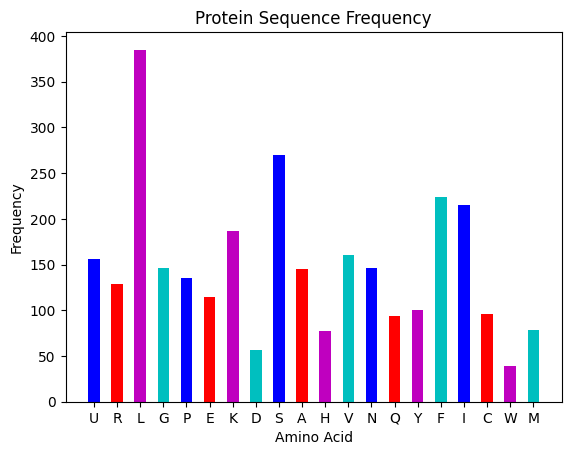

In [ ]:


#Most Common Amino Acids ----------------------------------------------------------


RNA_Codons = {
    # 'M' - START, '_' - STOP
    "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "UGU": "C", "UGC": "C",
    "GAU": "D", "GAC": "D",
    "GAA": "E", "GAG": "E",
    "UUU": "F", "UUC": "F",
    "GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G",
    "CAU": "H", "CAC": "H",
    "AUA": "I", "AUU": "I", "AUC": "I",
    "AAA": "K", "AAG": "K",
    "UUA": "L", "UUG": "L", "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
    "AUG": "M",
    "AAU": "N", "AAC": "N",
    "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "CAA": "Q", "CAG": "Q",
    "CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R", "AGA": "R", "AGG": "R",
    "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S", "AGU": "S", "AGC": "S",
    "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
    "UGG": "W",
    "UAU": "Y", "UAC": "Y",
    "UAA": "_", "UAG": "_", "UGA": "_"
}



#Most Common Amino Acids ----------------------------------------------------------
from collections import Counter
common_amino = Counter(autism_dna)
common_amino.most_common(10) #Gets the Top 10 most common amino acids
del common_amino['*']
width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Protein Sequence Frequency')
print(f"- Autism's genome has {sum(common_amino.values())} possible amino acids based on 1st analysis")
# According to our Analysis we got the highest amount amino acids in Leucine and Serine.

# This code simplies our amino acids by splitting it at each stop codon making our count of amino acids more accurate:
proteins = autism_dna.split('*')
proteins[:5]
print(f'- There are total of {len(proteins)} actual amino acids in the Autism genome')


# We have converted DNA->RNA->Amino Acids, now we are converting it Proteins
# We will check after our splits to see how many Proteins are there, since only +20 amino acids are actually proteins
for protein in proteins:
    if len(protein) < 20:
        proteins.remove(protein)
print(f'- We have {len(proteins)} proteins with more than 20 amino acids in the covid-19 genome')


# This Code gets the Top 5 Proteins in our amino acids:
top_5_proteins = sorted(proteins, key = len)
top_5_proteins[-1] # This is the largest protein we have from all our DNA sample from NCBI Database based from the ID
#Basically the longer the protein, the more effect it has person/dna_sequence
print('- Longest Protein:',top_5_proteins[-1])
print("- The total length of longest protein is", len(top_5_proteins[-1]))


# Saves our Longest Protein into a file to be observed later
with open("protein_seq.fasta", "w") as file:
    file.write(f">covid protein\n{top_5_proteins[-1]}")

#Counting Kmer: PxxP, with every two amino acids = x, there is P=Per
#Counting Kmer: PxxP, with every two amino acids = x, there is P=Per